# Handwritten Digits From Scratch

Video: https://www.youtube.com/watch?v=w8yWXqWQYmU&ab_channel=SamsonZhang

Data: https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/input?select=sample_submission.csv

![Network design](data/network.png)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in data

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
# Convert into a more useful data type
data = np.array(data)

In [6]:
# Get the dimensions of the data, 42000 x 785, rows x columns
m, n = data.shape
#42000 rows, each row is one box

In [7]:
# shuffle before splitting into dev and training sets
np.random.shuffle(data) 

## Split Training and testing data

In [8]:
#Separate out first 1000 boxes of data and transpose them
data_dev = data[0:1000].T #.T = transposed, so each column is a box
# Take out the row that represents the answers
Y_dev = data_dev[0]
# The actual data
#adjust data to put all pixel values between 0 and 1 (?)
X_dev = data_dev[1:n] / 225. #n=785

In [9]:
#All the answers
Y_dev

array([9, 4, 1, 1, 4, 5, 3, 0, 0, 0, 4, 6, 7, 7, 0, 6, 7, 0, 9, 8, 6, 4,
       9, 8, 4, 4, 3, 5, 3, 6, 5, 2, 1, 4, 7, 8, 1, 2, 1, 0, 5, 7, 4, 9,
       0, 9, 7, 0, 4, 8, 5, 8, 1, 5, 5, 3, 0, 8, 5, 0, 1, 6, 4, 1, 7, 3,
       7, 4, 9, 3, 6, 2, 5, 3, 5, 4, 6, 0, 2, 6, 8, 8, 1, 2, 6, 1, 2, 1,
       5, 3, 5, 1, 3, 6, 4, 6, 7, 4, 5, 0, 1, 1, 5, 9, 1, 6, 3, 3, 6, 8,
       9, 4, 4, 6, 5, 0, 8, 8, 0, 2, 5, 2, 7, 7, 6, 9, 6, 1, 5, 0, 3, 9,
       2, 3, 5, 1, 7, 8, 4, 7, 0, 0, 9, 1, 2, 9, 7, 6, 6, 8, 1, 0, 6, 1,
       9, 0, 8, 6, 9, 3, 4, 4, 9, 8, 1, 3, 5, 5, 6, 5, 1, 8, 3, 0, 1, 1,
       3, 9, 1, 3, 5, 8, 5, 2, 5, 1, 7, 3, 7, 8, 1, 4, 0, 3, 1, 0, 1, 5,
       5, 2, 3, 1, 2, 6, 6, 3, 9, 2, 0, 3, 8, 1, 5, 5, 5, 6, 4, 3, 0, 1,
       0, 4, 6, 5, 7, 5, 7, 3, 3, 5, 3, 1, 4, 2, 3, 0, 5, 0, 6, 3, 3, 6,
       9, 7, 9, 2, 2, 0, 3, 7, 5, 3, 6, 1, 4, 3, 2, 7, 7, 2, 9, 8, 4, 2,
       3, 7, 1, 6, 6, 7, 5, 0, 7, 2, 9, 3, 3, 3, 6, 0, 0, 5, 9, 8, 8, 5,
       0, 1, 6, 1, 4, 1, 3, 2, 0, 9, 4, 1, 0, 0, 0,

In [10]:
#X_dev

## Training data

In [11]:
#Do the same thing with another chunk of data
data_train = data[1000:m].T
# The answers
Y_train = data_train[0]
#The data
X_train = data_train[1:n]

In [12]:
#Not sure what this does
#adjust data to put all pixel values between 0 and 1 (?)
X_train = X_train / 255.
#m = number of training boxes we have
_,m_train = X_train.shape

## Neural network functions

### Initialize weights and biases

In [13]:
def init_params():
    #np.random.rand creates arrays of random numbers of the size given
    # Create ten weights for each of the 784 boxes for the ten nodes of the first row
    W1 = np.random.rand(10,784)-.5
    # Give each node of the first row a bias
    b1 = np.random.rand(10,1)-.5
    #Ten weight for the ten nodes to get to the ten nodes of the next layer
    W2 = np.random.rand(10,10)-.5
    #Ten biases for the second layer
    b2 = np.random.rand(10,1)-.5
    return W1,b1,W2,b2

In [36]:
# Just sets the variables to how they're defined above
W1,b1,W2,b2 = init_params()

In [15]:
W1.shape

(10, 784)

### Forward propagation

In [16]:
#Relu function that defines how positive a data point is. Negative values return 0 and positive values return themselves.
def ReLU(Z):
    return np.maximum(0,Z)

In [42]:
def softmax(Z):
    #np.exp takes e^x 
    return np.exp(Z) / sum(np.exp(Z))

7.290000000000001

In [18]:
def forward_prop(W1,b1,W2,b2,X):
    #.dot takes the dot product of two arrays
    Z1 = W1.dot(X) + b1
    #How positive is Z1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [19]:
def ReLU_deriv(Z):
    return (Z > 0)

In [20]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

## Back Propagation

In [21]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    #Maybe remove the line below this?
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [22]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## Running the model

### Prepare gradient descent

In [23]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

### Run it

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 0 4 ... 7 0 4] [7 8 6 ... 4 5 2]
0.14121951219512194
Iteration:  50
[7 3 6 ... 1 3 1] [7 8 6 ... 4 5 2]
0.46960975609756095
Iteration:  100
[7 3 6 ... 8 3 2] [7 8 6 ... 4 5 2]
0.6132195121951219
Iteration:  150
[7 8 6 ... 8 3 2] [7 8 6 ... 4 5 2]
0.7046341463414634
Iteration:  200
[7 8 6 ... 9 3 2] [7 8 6 ... 4 5 2]
0.7530487804878049
Iteration:  250
[7 8 6 ... 9 3 2] [7 8 6 ... 4 5 2]
0.7831219512195122
Iteration:  300
[7 8 6 ... 9 3 2] [7 8 6 ... 4 5 2]
0.804219512195122
Iteration:  350
[7 8 6 ... 9 3 2] [7 8 6 ... 4 5 2]
0.8198292682926829
Iteration:  400
[7 8 6 ... 9 5 2] [7 8 6 ... 4 5 2]
0.8306097560975609
Iteration:  450
[7 8 6 ... 4 5 2] [7 8 6 ... 4 5 2]
0.8390731707317073


## Testing

To test the model 

In [25]:
_, _, _, A2 = forward_prop(W1,b1,W2, b2,X_dev)

In [26]:
print("Accuracy",get_accuracy(get_predictions(A2),Y_dev))
predictions = get_predictions(A2)

[9 4 1 1 4 5 7 0 0 0 4 6 7 7 0 6 1 0 3 8 6 4 9 8 9 4 8 2 3 2 3 2 1 9 7 8 1
 2 1 0 5 7 4 9 0 9 7 0 4 8 8 3 1 5 5 3 0 8 5 0 1 6 4 1 7 3 9 9 9 3 6 2 6 3
 6 9 6 0 2 6 8 8 2 6 6 1 2 1 5 3 5 1 3 6 4 6 7 9 3 0 1 1 5 4 1 6 5 2 6 8 3
 4 4 6 5 0 8 8 7 2 1 4 7 7 6 9 6 1 5 0 3 9 2 1 5 1 7 8 4 7 0 0 9 1 2 9 7 6
 4 8 1 0 6 1 9 0 5 6 3 3 4 4 9 5 1 5 5 5 4 5 1 8 3 0 1 1 3 9 1 3 5 8 5 2 0
 1 7 3 1 8 1 4 0 3 1 3 1 5 5 2 3 8 2 6 6 3 9 2 0 3 8 1 5 5 2 6 9 7 0 1 0 4
 6 5 7 5 7 3 3 5 3 1 4 2 3 0 5 0 6 3 9 6 9 7 4 2 2 5 3 7 3 3 6 1 4 3 2 7 4
 2 9 8 4 2 3 7 1 6 6 7 5 0 7 2 5 8 3 3 6 0 6 5 9 2 8 5 0 1 6 1 4 1 3 2 0 1
 4 1 0 0 0 8 3 6 7 7 4 1 7 5 2 4 8 3 0 3 7 5 3 4 1 0 5 6 8 1 8 7 5 5 0 4 8
 8 3 9 7 9 1 6 0 1 0 5 5 1 4 3 4 2 4 4 8 4 1 7 0 9 9 5 0 3 6 7 8 8 8 3 4 2
 5 8 3 4 6 0 7 3 8 6 7 9 5 0 0 1 3 6 2 1 5 7 8 6 9 9 3 7 0 3 2 1 1 0 3 6 2
 7 4 4 2 1 5 9 2 1 8 6 8 7 9 4 2 8 9 7 1 7 7 0 3 6 6 0 1 8 2 2 1 1 0 2 8 0
 7 1 7 5 5 1 2 2 9 5 9 8 9 0 0 0 4 0 1 6 6 7 7 1 5 3 4 0 3 2 2 5 4 7 9 6 7
 6 1 1 9 8 6 5 5 7 7 2 8 

In [27]:
wrong = []
for i in range(len(predictions)):
    if Y_dev[i] != predictions[i]:
        wrong.append(i)
print(len(wrong))
print(wrong)

170
[6, 16, 18, 24, 26, 27, 29, 30, 33, 50, 51, 66, 67, 72, 74, 75, 82, 83, 97, 98, 103, 106, 107, 110, 118, 120, 121, 133, 148, 156, 158, 163, 165, 168, 184, 188, 195, 201, 214, 216, 217, 240, 244, 247, 250, 258, 274, 275, 280, 283, 295, 311, 313, 314, 317, 329, 331, 343, 344, 346, 356, 357, 367, 370, 371, 376, 377, 381, 383, 385, 394, 401, 405, 409, 416, 418, 421, 434, 437, 439, 440, 441, 444, 451, 455, 465, 473, 474, 480, 496, 500, 501, 502, 515, 516, 517, 523, 524, 530, 532, 536, 539, 549, 569, 573, 575, 591, 593, 600, 609, 613, 619, 633, 635, 641, 643, 650, 651, 654, 655, 657, 662, 663, 668, 676, 679, 682, 684, 688, 691, 697, 699, 708, 716, 722, 743, 744, 752, 756, 759, 760, 766, 770, 784, 806, 832, 860, 864, 868, 873, 880, 883, 892, 897, 902, 913, 918, 922, 940, 951, 956, 964, 970, 974, 976, 981, 987, 991, 992, 995]


In [28]:
# Rotate all the data with the boxes
X_dev_images = X_dev.T

In [29]:
#Turn 1000 rows of 784 digits into 1000 rows of 28x28 boxes
X_dev_images = X_dev_images.reshape(1000,28,28)

In [30]:
# graphit(the data to graph, the answers, # of rows of graph grid, # of cols of graph grid, where to start in the data, size of graph)
def graph_predictions(images, labels, predictions, rows=1, cols=1, start=0, zoom=2):
   #The number of images we have to graph
  n_images = rows * cols
    #Make a graph the correct size
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
    # For every graph we need to make
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]) + " looks like : " + str(predictions[n+start]))
  plt.show()

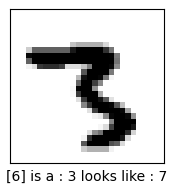

In [33]:
graph_predictions(X_dev_images,Y_dev,predictions,1,1,6,zoom=2)